In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#ignore warning 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#library import for logistic Regression requirment
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
sns.set()

In [4]:
#import dataset
data=pd.read_csv('diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


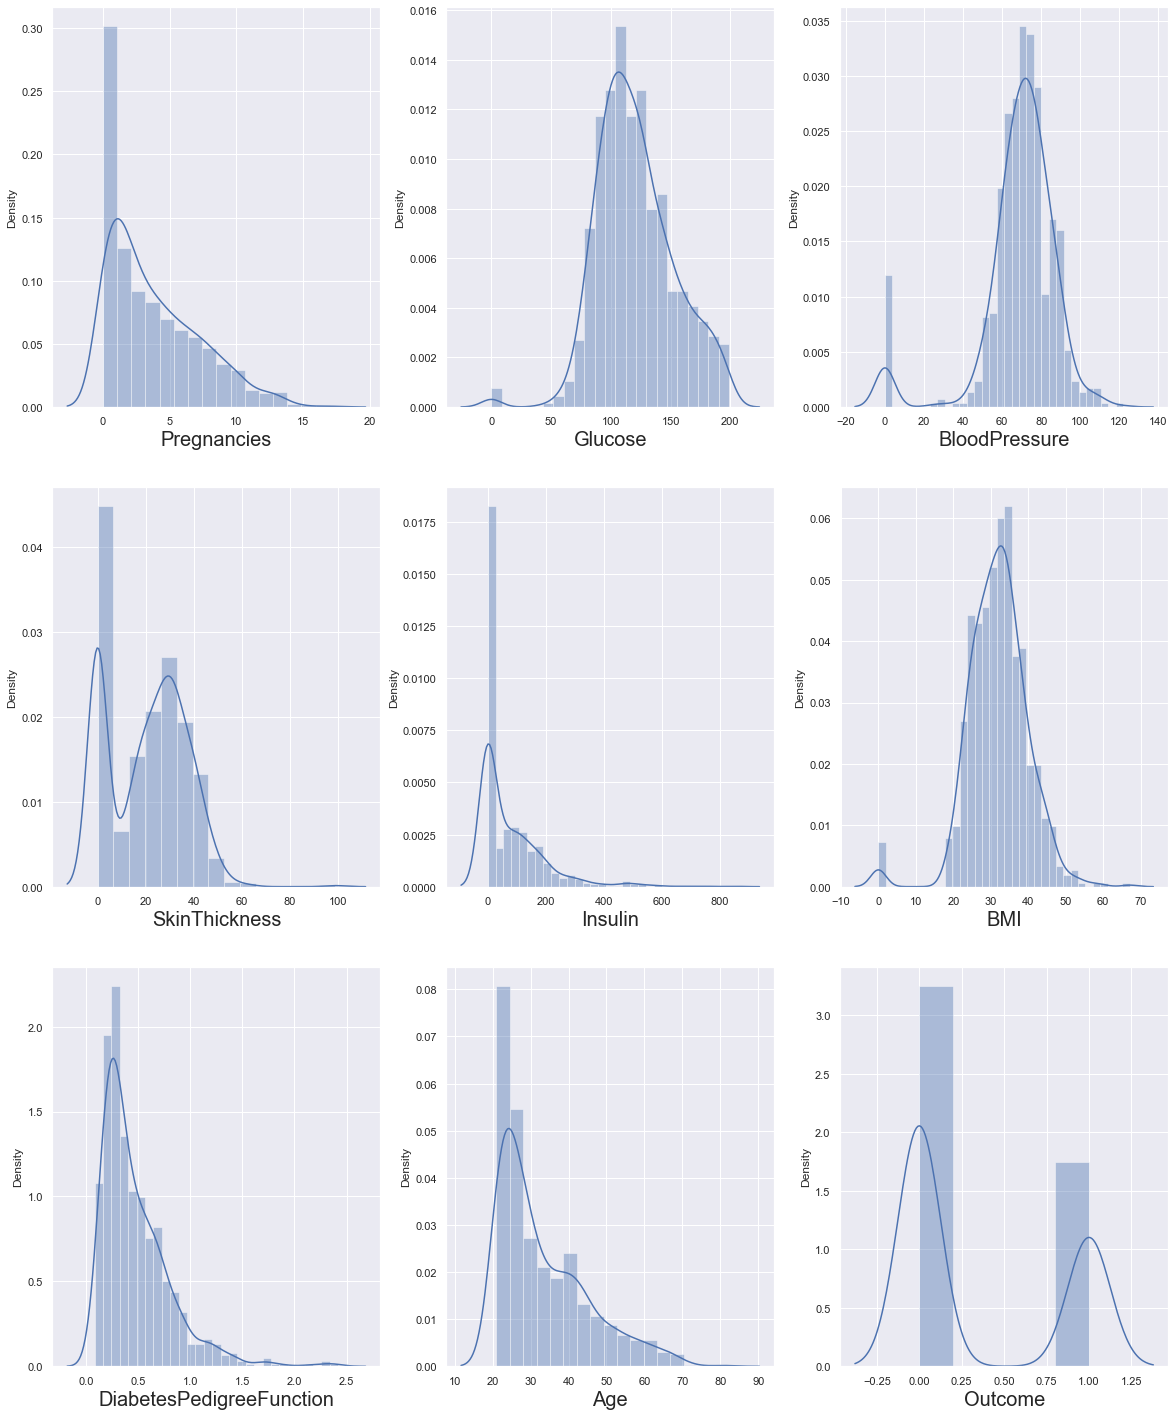

In [14]:
#visulaziation
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [15]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [16]:
data['BMI']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [17]:
data['BloodPressure']

0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64

In [18]:
data['Glucose']

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [19]:
data['Insulin']

0       79.799479
1       79.799479
2       79.799479
3       94.000000
4      168.000000
          ...    
763    180.000000
764     79.799479
765    112.000000
766     79.799479
767     79.799479
Name: Insulin, Length: 768, dtype: float64

In [20]:
data['SkinThickness']

0      35.000000
1      29.000000
2      20.536458
3      23.000000
4      35.000000
         ...    
763    48.000000
764    27.000000
765    23.000000
766    20.536458
767    31.000000
Name: SkinThickness, Length: 768, dtype: float64

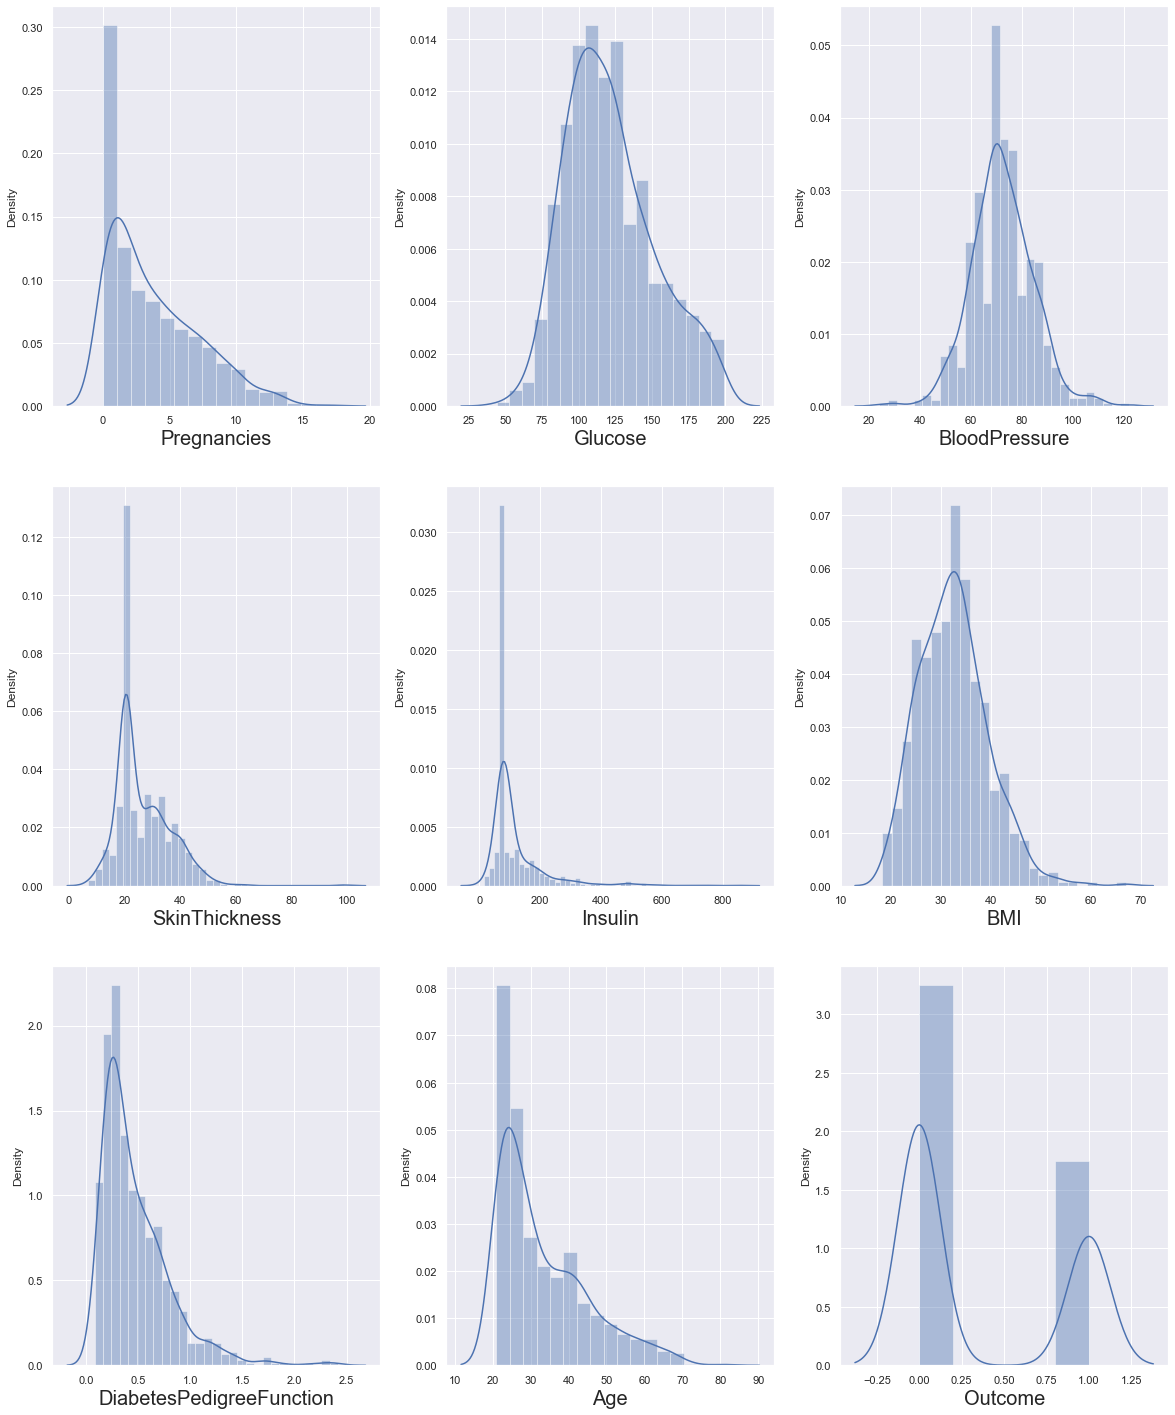

In [21]:
#visulaziation
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

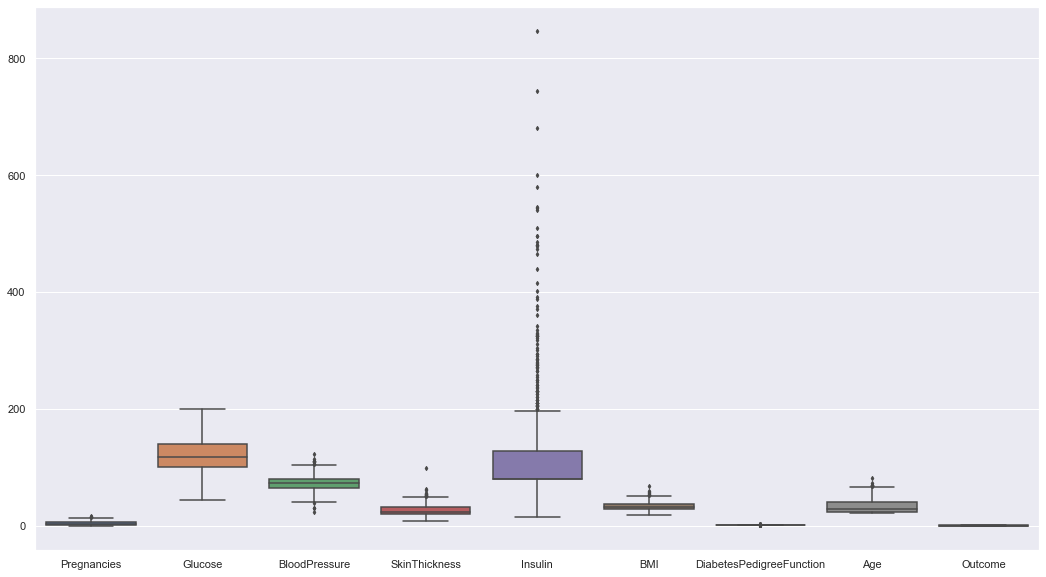

In [32]:
fig,ax=plt.subplots(figsize=(18,10))
sns.boxplot(data=data,ax=ax,fliersize=3)

In [33]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]

q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

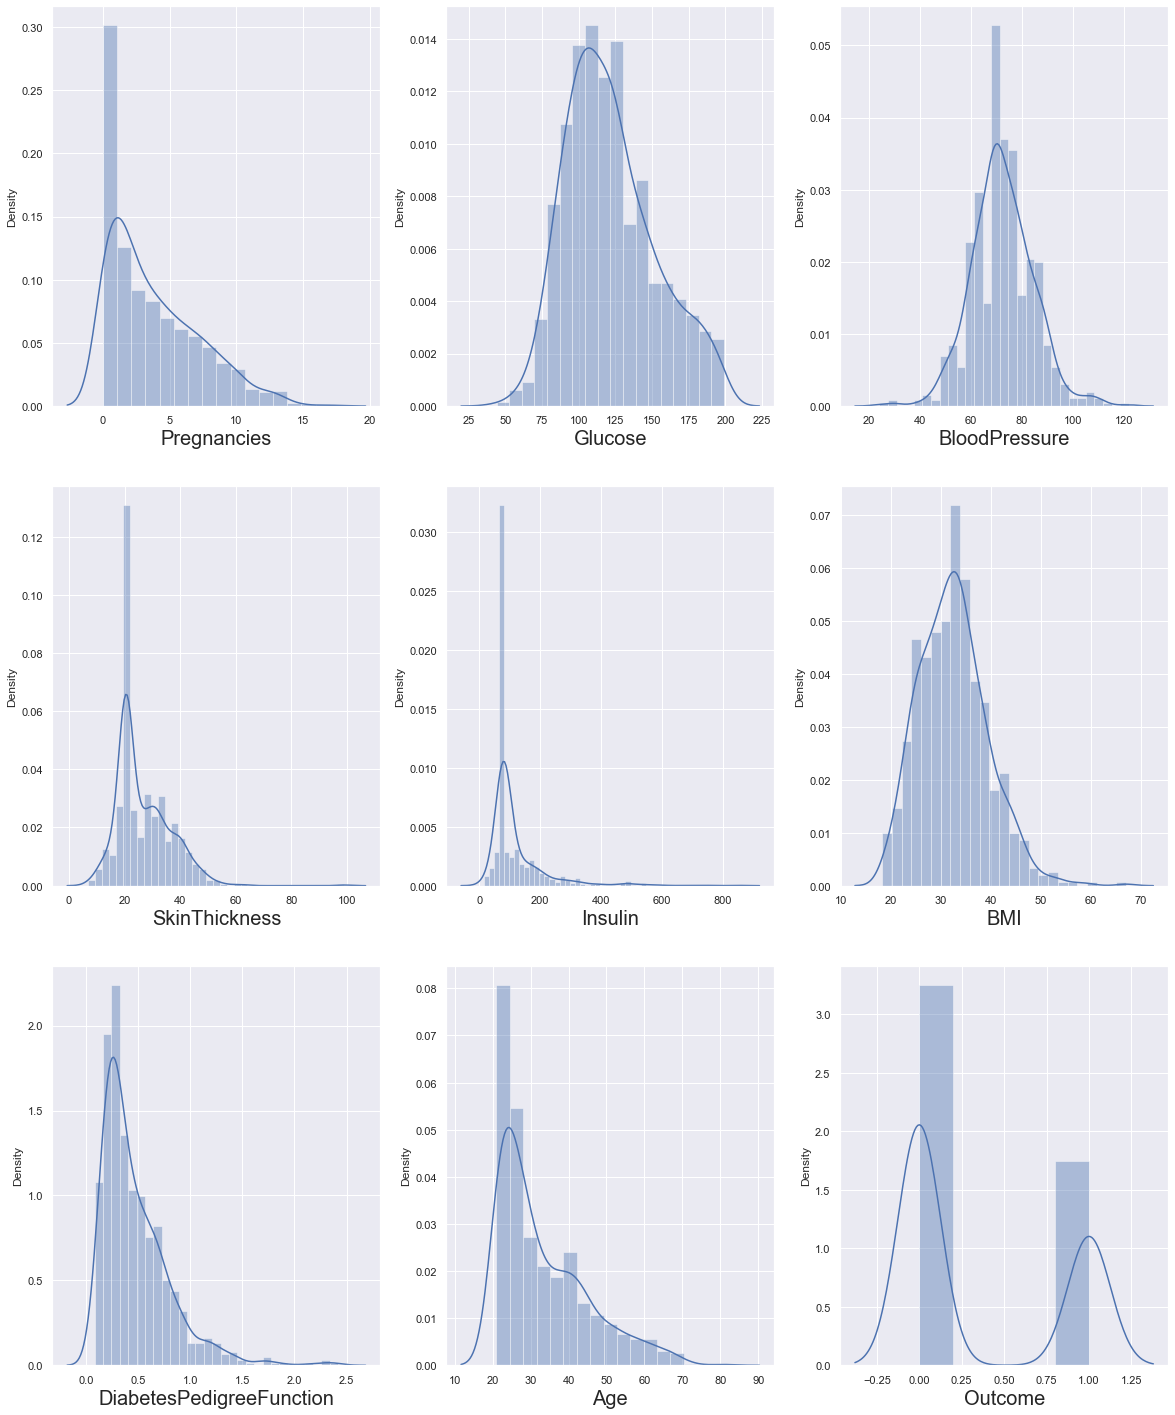

In [34]:
#visulaziation
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

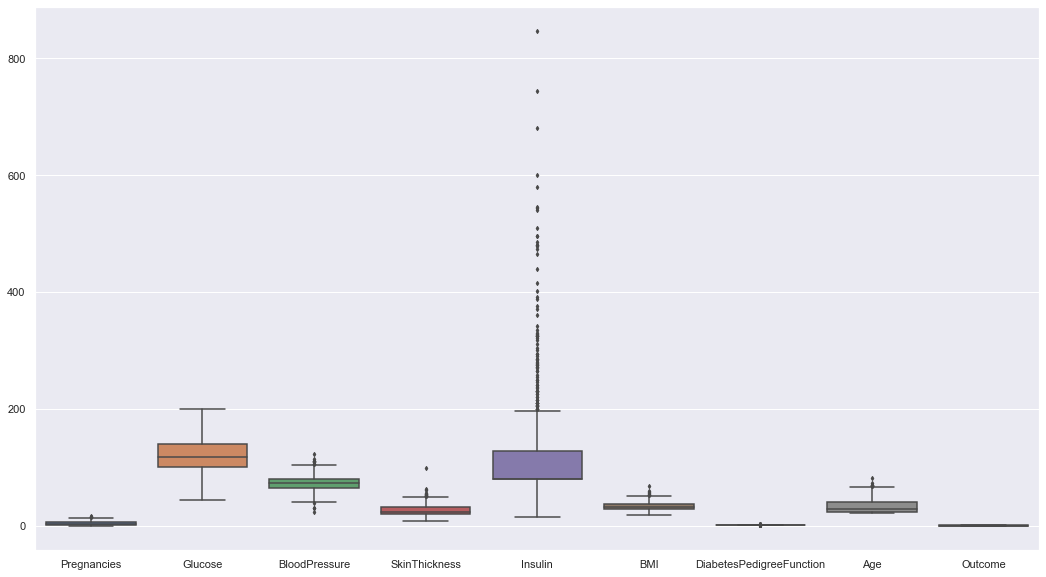

In [35]:
fig,ax=plt.subplots(figsize=(18,10))
sns.boxplot(data=data,ax=ax,fliersize=3)

In [36]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [37]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

In [38]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [39]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

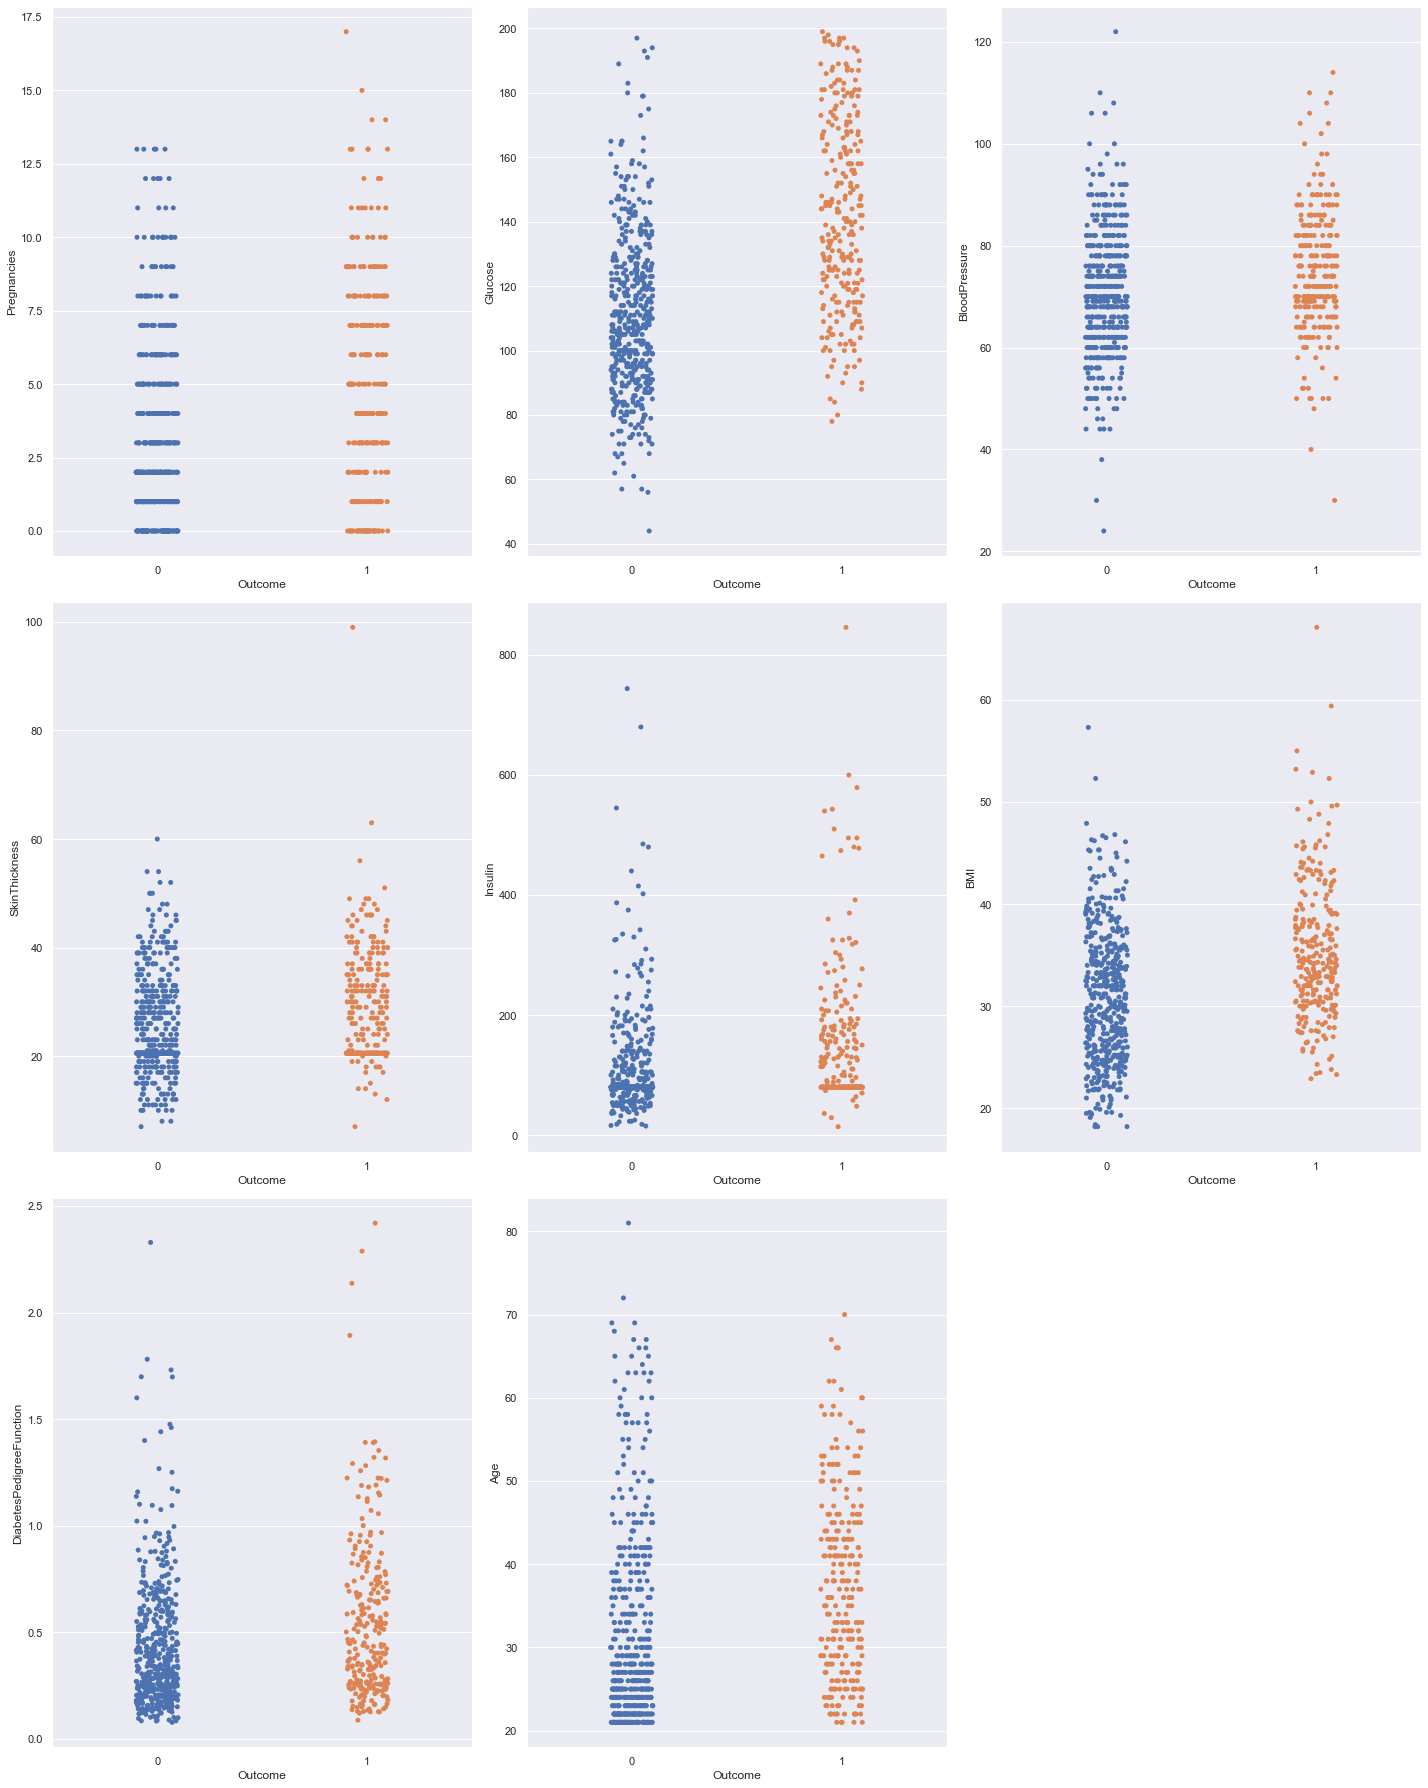

In [41]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

## VIF Testing

In [43]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [45]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [47]:
vif['Features'] = x.columns

In [48]:
vif

,VIF,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [52]:
#Train data set
x_train,x_test,y_train,y_test =train_test_split(x_scaled,y,test_size = 0.25,random_state=355)

In [53]:
log_reg = LogisticRegression()

In [54]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [56]:
import pickle

## Save Model in local File System

In [58]:
filename='logistic_model.pickle'
pickle.dump(log_reg,open(filename,'wb'))

In [59]:
load_model=pickle.load(open(filename,'rb'))

## Performance of Model

In [60]:
y_pred = log_reg.predict(x_test)

In [62]:
accuracy = accuracy_score(y_test,y_pred)

In [63]:
accuracy

0.7552083333333334

## Confussion Matrix

In [64]:
confusion_matrix= confusion_matrix(y_test,y_pred)

In [65]:
confusion_matrix

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [70]:
True_positive  = confusion_matrix[0][0]
False_positive  = confusion_matrix[0][1]
False_negative = confusion_matrix[1][0]
True_negative  = confusion_matrix[1][1]

In [71]:
print("True positive confusion matrix :- ",True_positive)
print("False positive confusion matrix :- ",False_poitive)
print("False Negative confusion matrix :- ",False_negative)
print("True Negative confusion matrix :-  ",True_negative)

True positive confusion matrix :-  110
False positive confusion matrix :-  15
False Negative confusion matrix :-  32
True Negative confusion matrix :-   35


## Breaking down the formula for Accuracy

In [72]:
Accuracy = (True_positive + True_negative) / (True_positive + False_positive + True_negative + False_negative)

In [73]:
Accuracy

0.7552083333333334

## Precison

In [74]:
precison = (True_positive) / (True_positive + False_positive)

In [75]:
precison

0.88

## Recall

In [78]:
recall = (True_positive) / ( True_positive + False_negative)

In [79]:
recall

0.7746478873239436

## F1 Score

In [80]:
F1_score = 2 * (recall*precison) / ( recall + precison)

In [81]:
F1_score

0.8239700374531835

## Area under the curve

In [82]:
area_under_the_curve = roc_auc_score(y_test,y_pred)

In [83]:
area_under_the_curve

0.7011940298507463

## ROC(Receiver Operator Characteristic)


In [84]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [85]:
fpr

array([0.  , 0.12, 1.  ])

In [86]:
tpr

array([0.        , 0.52238806, 1.        ])

In [87]:
thresholds

array([2, 1, 0], dtype=int64)

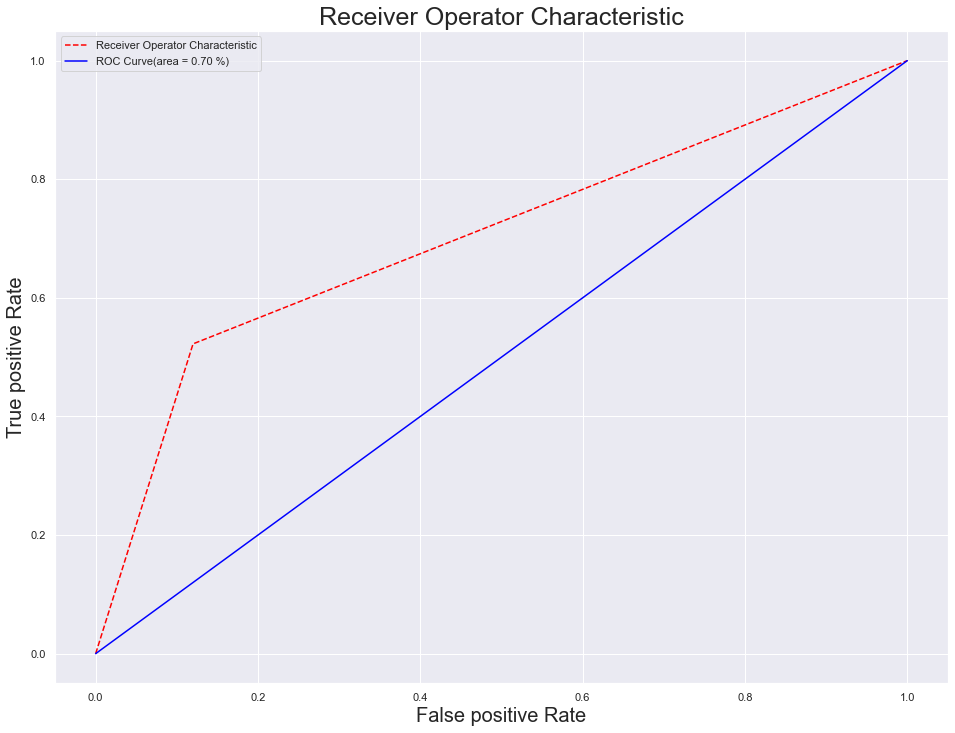

In [91]:
plt.figure(figsize=(16,12))
plt.plot(fpr,tpr,color='red',label='Receiver Operator Characteristic',linestyle= '--' )
plt.plot([0,1],[0,1],color='blue',label ='ROC Curve(area = 0.70 %)')
plt.xlabel("False positive Rate",fontsize= 20)
plt.ylabel("True positive Rate",fontsize = 20)
plt.title("Receiver Operator Characteristic",fontsize=25)
plt.legend()
plt.show()

#### What is the significance of Roc curve and AUC?

In real life, we create various models using different algorithms that we can use for classification purpose. We use AUC to determine which model is the best one to use for a given dataset. 
Suppose we have created Logistic regression, SVM as well as a clustering model for classification purpose. We will calculate AUC for all the models seperately. The model with highest AUC value will be the best model to use.


#### Advantages of Logisitic Regression

* It is very simple and easy to implement.
* The output is more informative than other classification algorithms
* It expresses the relationship between independent and dependent variables
* Very effective with linearly seperable data

#### Disadvantages of Logisitic Regression

* Not effective with data which are not linearly seperable 
* Not as powerful as other classification models
* Multiclass classifications are much easier to do with other algorithms than logisitic regression
* It can only predict categorical outcomes




